# Investigation of Liklihood
## Example: One gaussian ausssian function 

In [1]:
from matplotlib import pyplot as mp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.widgets import Slider

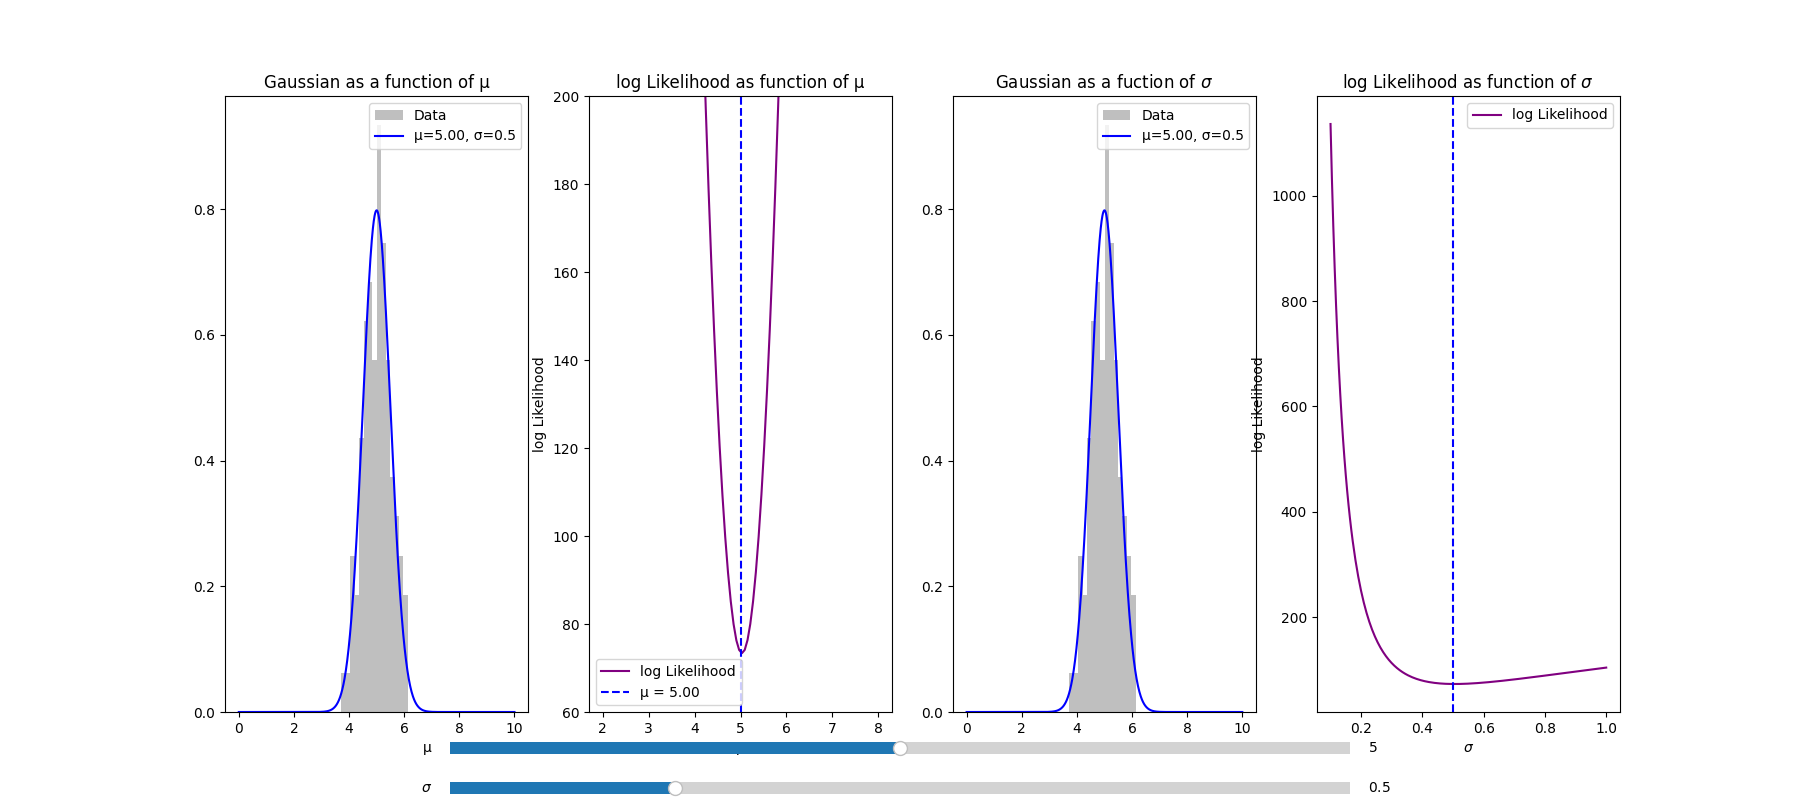

In [26]:
%matplotlib widget
np.random.seed(0)
true_mu, true_sigma = 5, 0.5
data = np.random.normal(true_mu, true_sigma, size=100)

fig, ax = plt.subplots(1, 4, figsize=(18, 8))
mu_range = np.linspace(2, 8, 100)
sigma_range = np.linspace(0.1, 1, 200)

def log_likelihood(data, mu, sigma):
    n = len(data)
    log_likelihood_value = 0.5 * n * np.log(2 * np.pi * sigma**2) + np.sum((data - mu)**2) / (2 * sigma**2)
    return log_likelihood_value


log_likelihood_values_mue = [log_likelihood(data, mu, true_sigma) for mu in mu_range]
log_likelihood_values_sigma = [log_likelihood(data, true_mu ,sigma) for sigma in sigma_range]
ymax=200
ymin=60
ax[0].hist(data, bins=15, density=True, alpha=0.5, color="gray", label="Data")
x_vals = np.linspace(0, 10, 1000)
y_vals = norm.pdf(x_vals, true_mu, true_sigma)
gaussian_plot_mue, = ax[0].plot(x_vals, y_vals, color="blue", label=f"μ={true_mu:.2f}, σ={true_sigma}")
ax[0].set_title("Gaussian as a function of μ")
ax[0].legend()

ll_plot_mue, = ax[1].plot(mu_range, log_likelihood_values_mue, color="purple", label="log Likelihood")
vline_mue = ax[1].axvline(true_mu, color="blue", linestyle="dashed", label=f"μ = {true_mu:.2f}")
ax[1].set_xlabel("μ")
ax[1].set_ylabel("log Likelihood")
ax[1].set_title("log Likelihood as function of μ")
ax[1].set_ylim(ymin, ymax)
ax[1].legend()

ax[2].hist(data, bins=15, density=True, alpha=0.5, color="gray", label="Data")
x_vals = np.linspace(0, 10, 1000)
y_vals = norm.pdf(x_vals, true_mu, true_sigma)
gaussian_plot_sigma, = ax[2].plot(x_vals, y_vals, color="blue", label=f"μ={true_mu:.2f}, σ={true_sigma}")
ax[2].set_title(R"Gaussian as a fuction of $\sigma$ ")
ax[2].legend()

ll_plot_sigma, = ax[3].plot(sigma_range, log_likelihood_values_sigma, color="purple", label="log Likelihood")
vline_sigma = ax[3].axvline(true_sigma, color="blue", linestyle="dashed")
ax[3].set_xlabel(R"$\sigma$")
ax[3].set_ylabel("log Likelihood")
ax[3].set_title(R"log Likelihood as function of $\sigma$")
ax[3].legend()

ax_mu = plt.axes([0.25, 0.05, 0.5, 0.03])
ax_sigma = plt.axes([0.25, 0., 0.5, 0.03])
slider_mu = Slider(ax_mu, 'μ', 2, 8, valinit=true_mu)
slider_sigma = Slider(ax_sigma, R'$\sigma$', 0, 2, valinit=true_sigma)

def update(val):
    mu_val = slider_mu.val
    sigma_val = slider_sigma.val
    new_y_vals_mue = norm.pdf(x_vals, mu_val, true_sigma)
    gaussian_plot_mue.set_ydata(new_y_vals_mue)  
    
    new_y_vals_sigma = norm.pdf(x_vals,true_mu, sigma_val,)
    gaussian_plot_sigma.set_ydata(new_y_vals_sigma)  
    vline_mue.set_xdata([mu_val, mu_val])
    vline_mue.set_label(f"μ")
    vline_sigma.set_xdata([sigma_val, sigma_val])
    vline_sigma.set_label(f"μ")
    ax[1].legend()


slider_mu.on_changed(update)
slider_sigma.on_changed(update)
plt.show()

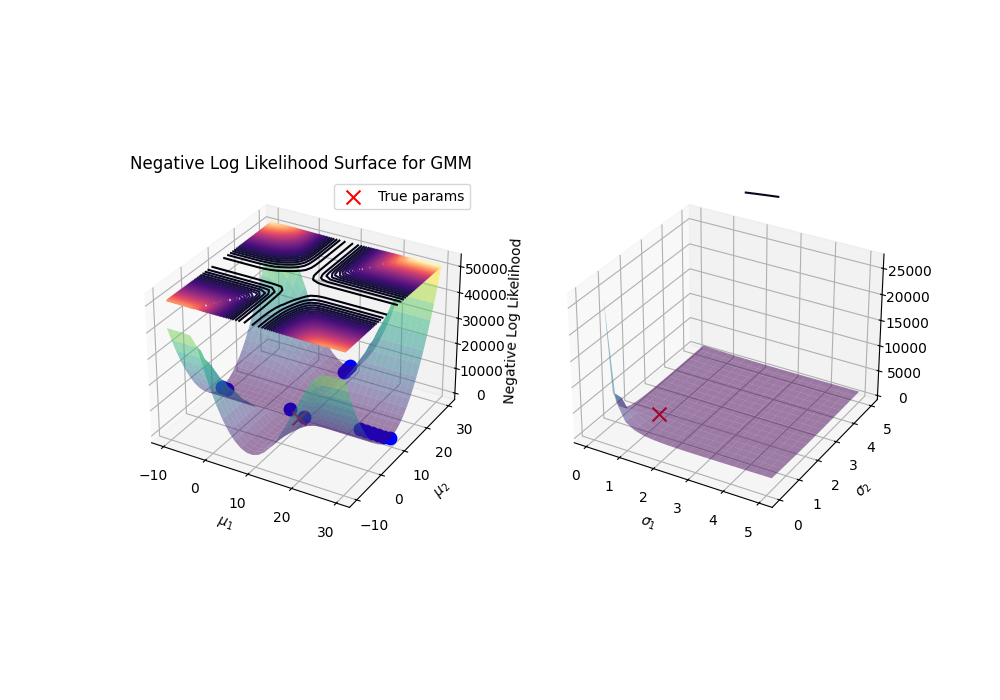

In [25]:
np.random.seed(1)
true_mu1, true_sigma1, weight1 = 10, 1.0, 0.6
true_mu2, true_sigma2, weight2 = 7, 1.5, 0.4

n_samples = 500
data = np.hstack([
    np.random.normal(true_mu1, true_sigma1, size=int(n_samples * weight1)),
    np.random.normal(true_mu2, true_sigma2, size=int(n_samples * weight2))
])

def neg_log_likelihood_gmm(data, mu1, sigma1, mu2, sigma2, weight1):
    weight2 = 1 - weight1
    likelihoods = (weight1 * norm.pdf(data, mu1, sigma1) + 
                   weight2 * norm.pdf(data, mu2, sigma2))
    return -np.sum(np.log(likelihoods))


mu1_range = np.linspace(-10, 30, 30)
mu2_range = np.linspace(-10, 30, 30)
sigma1_range = np.linspace(0, 5, 20)
sigma2_range = np.linspace(0, 5, 20)
neg_log_likelihood_values = np.zeros((len(mu1_range), len(mu2_range)))
neg_log_likelihood_values1 = np.zeros((len(sigma1_range), len(sigma2_range)))

footprint = np.ones((3, 3)) 
for i, mu1 in enumerate(mu1_range):
    for j, mu2 in enumerate(mu2_range):
        neg_log_likelihood_values[i, j] = neg_log_likelihood_gmm(data, mu1, 1.0, mu2, 1.5, 0.5)
local_minima_mask = (neg_log_likelihood_values == minimum_filter(neg_log_likelihood_values, footprint=footprint))
for i, sigma1 in enumerate(sigma1_range):
    for j, sigma2 in enumerate(sigma2_range):
        neg_log_likelihood_values1[i, j] = neg_log_likelihood_gmm(data, 7, sigma1, 6.9, sigma2, 0.5)
local_minima_mask1 = (neg_log_likelihood_values1 == minimum_filter(neg_log_likelihood_values1, footprint=footprint))


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')


X, Y = np.meshgrid(mu1_range, mu2_range)
X1, Y1 = np.meshgrid(sigma1_range, sigma2_range)
ax.plot_surface(X, Y, neg_log_likelihood_values.T, cmap='viridis',alpha=0.5)
ax1.plot_surface(X1, Y1, neg_log_likelihood_values1.T, cmap='viridis',alpha=0.5)

ax.contour(X, Y, neg_log_likelihood_values.T, levels=50, cmap="magma", offset=np.max(neg_log_likelihood_values) + 50)
ax1.contour(X1, Y1, neg_log_likelihood_values1.T, levels=20, cmap="magma", offset=np.max(neg_log_likelihood_values) + 50)


true_nll = neg_log_likelihood_gmm(data, true_mu1, true_sigma1, true_mu2, true_sigma2, 0.5)
ax.scatter([true_mu1], [true_mu2], [true_nll], color="red", s=100, marker="x", label="True params")
ax1.scatter([true_sigma1], [true_sigma2], [true_nll], color="red", s=100, marker="x", label="True params")


for idx in np.argwhere(local_minima_mask):
    mu1_min, mu2_min = mu1_range[idx[0]], mu2_range[idx[1]]
    nll_min = neg_log_likelihood_values[idx[0], idx[1]]
    ax.scatter(mu1_min, mu2_min, nll_min, color="BLUE", s=80, marker="o")

ax.set_xlabel(r'$\mu_1$')
ax.set_ylabel(r'$\mu_2$')
ax1.set_xlabel(r'$\sigma_1$')
ax1.set_ylabel(r'$\sigma_2$')
ax.set_zlabel('Negative Log Likelihood')
ax.set_title("Negative Log Likelihood Surface for GMM")
ax.legend()

plt.show()


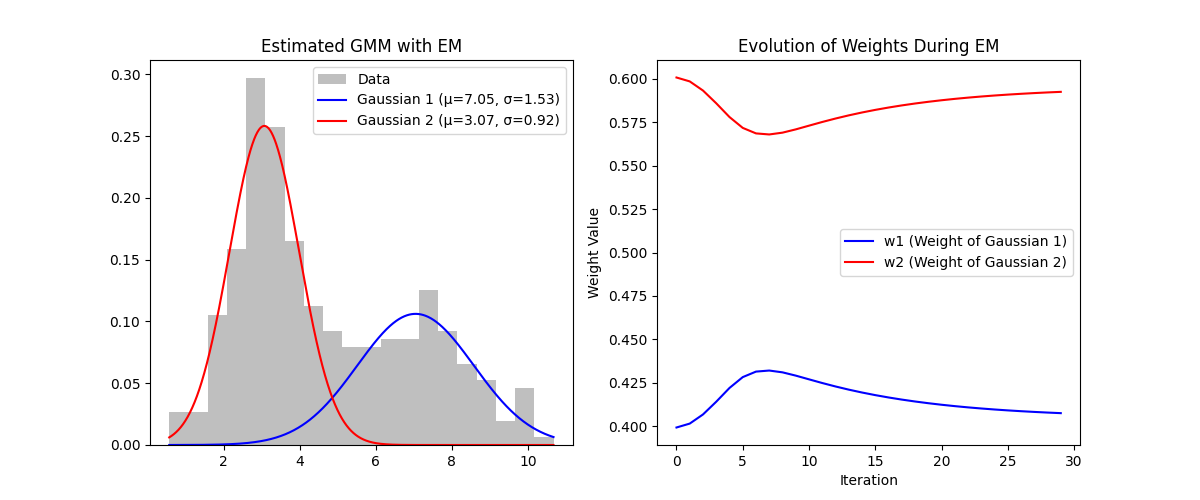

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(1)
true_mu1, true_sigma1, weight1 = 3, 1.0, 0.6
true_mu2, true_sigma2, weight2 = 7, 1.5, 0.4
n_samples = 300

data = np.hstack([
    np.random.normal(true_mu1, true_sigma1, size=int(n_samples * weight1)),
    np.random.normal(true_mu2, true_sigma2, size=int(n_samples * weight2))
])

np.random.seed(1)
mu1, mu2 = np.random.choice(data, 2, replace=False)
sigma1, sigma2 = np.std(data), np.std(data)
w1, w2 = 0.5, 0.5 

n_iterations = 30
log_likelihoods = []
weights_history = []

for _ in range(n_iterations):
    resp1 = w1 * norm.pdf(data, mu1, sigma1)
    resp2 = w2 * norm.pdf(data, mu2, sigma2)
    sum_resp = resp1 + resp2
    gamma1 = resp1 / sum_resp
    gamma2 = resp2 / sum_resp

    w1 = np.mean(gamma1)
    w2 = 1 - w1
    mu1 = np.sum(gamma1 * data) / np.sum(gamma1)
    mu2 = np.sum(gamma2 * data) / np.sum(gamma2)
    sigma1 = np.sqrt(np.sum(gamma1 * (data - mu1) ** 2) / np.sum(gamma1))
    sigma2 = np.sqrt(np.sum(gamma2 * (data - mu2) ** 2) / np.sum(gamma2))


    log_likelihoods.append(np.sum(np.log(w1 * norm.pdf(data, mu1, sigma1) + w2 * norm.pdf(data, mu2, sigma2))))
    weights_history.append((w1, w2))


weights_history = np.array(weights_history)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

x_vals = np.linspace(min(data), max(data), 1000)
ax[0].hist(data, bins=20, density=True, alpha=0.5, color="gray", label="Data")
ax[0].plot(x_vals, w1 * norm.pdf(x_vals, mu1, sigma1), label=f"Gaussian 1 (μ={mu1:.2f}, σ={sigma1:.2f})", color="blue")
ax[0].plot(x_vals, w2 * norm.pdf(x_vals, mu2, sigma2), label=f"Gaussian 2 (μ={mu2:.2f}, σ={sigma2:.2f})", color="red")
ax[0].set_title("Estimated GMM with EM")
ax[0].legend()

ax[1].plot(weights_history[:, 0], label="w1 (Weight of Gaussian 1)", color="blue")
ax[1].plot(weights_history[:, 1], label="w2 (Weight of Gaussian 2)", color="red")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Weight Value")
ax[1].set_title("Evolution of Weights During EM")
ax[1].legend()

plt.show()